---
# Python Course - Practical Class 3:
# Data Visualization
---

## Exercice # 1 - Multiplot figure

Considering all $mag_V < 10 $ stars can you find within 1 degree of the star Helvetios, create a 2 rows x 2 columns figure.

### Requirements
#### &rarr; `Top-Left` axis
- scatter plot of the selected stars by coordinates, centered on Helvetios
- `x-axis` = Right Ascension, shared with Bottow-Right axis
- `y-axis` = Declination, shared with Bottow-Right axis

#### &rarr; `Top-Right` axis:
- bar chart of the selected stars by spectral type
- `x-axis` = spectral types
- `y-axis` = number of stars by spectral type

#### &rarr; `Bottow-Left` axis:
- scatter plot of the selected stars, showing their visual magnitude as a function of their paralaxe
- best fit second degree polynomial to the scatter plot
- `x-axis` = paralaxe
- `y-axis` = visual magnitude
- show the legend

#### &rarr; `Bottow-Right` axis:
- image of a the sky within 1 degree around Helvetios
- `x-axis` = Right Ascension, shared with Top-Left axis
- `y-axis` = Declination, shared with Top-Left axis


#### &rarr; The labels and titles of each axis should be updated to reflect what they're displaying.


### _ Tips _
- see exercice `#1` of practical class `#2`
- for the `Bottow-Right` axis, you do not have to get the image programmatically




In [1]:
# imports
import matplotlib.pyplot as mplt
from matplotlib.lines import Line2D

from astropy.coordinates import Angle
import astropy.units as u

from astroquery.simbad import Simbad

import numpy as np

from skimage import io
from skimage.transform import rotate

from PyAstronomy.pyasl import ExoplanetEU2

In [2]:
# TOP LEFT -----------------------------------------------------------------
# getting data from simbad

# define custom Simbad query
customSimbad = Simbad()
#customSimbad.list_votable_fields()

# Add VoTable fields to custom query Simbad
customSimbad.add_votable_fields('sptype','flux(V)','parallax')
#print('updated VOTable fields in Simbad API: {}\n'.format(customSimbad.get_votable_fields()))

# query for region of 1 deg around Helvetios coordinates
region_table = customSimbad.query_region("Helvetios", radius=1. * u.deg)
mask_mag = (region_table["FLUX_V"] < 10 ) 

#print(region_table[mask_mag].keys())
print(region_table[mask_mag]['MAIN_ID','RA','DEC','SP_TYPE', 'FLUX_V','PLX_VALUE'])

    MAIN_ID           RA           DEC      SP_TYPE FLUX_V PLX_VALUE
                   "h:m:s"       "d:m:s"             mag      mas   
--------------- ------------- ------------- ------- ------ ---------
      *  51 Peg 22 57 27.9804 +20 46 07.782    G2IV   5.46    64.649
      HD 217116 22 58 07.9632 +20 44 33.313      K0   8.15     3.281
  TYC 1717-30-1 22 58 00.9166 +20 31 27.725     F9V   9.85     5.781
    BD+20  5251 22 57 12.7494 +21 06 32.720      G5   9.57     2.410
    BD+19  5033 22 56 21.8469 +20 31 01.015      F5   9.69     5.979
      HD 217317 22 59 42.6280 +20 37 15.471      F0   9.23     4.153
      HD 217385 23 00 03.7906 +21 13 10.573      F2   7.64     7.750
    V* V338 Peg 22 58 06.4171 +21 30 47.434           7.38     3.155
    BD+19  5029 22 54 20.8186 +20 29 12.119      G5   9.08     1.245
     HD 216671A 22 54 36.6058 +20 19 59.101     F9V   8.96     6.846
      HD 217015 22 57 24.5132 +19 57 45.480      K5   8.45     3.040
TYC 1714-1701-2  22 57 24.493  +19

In [3]:
# TOP RIGHT -----------------------------------------------------------------
# get spectral types
sptypes_list = [sptype[0]   for sptype in list(region_table[mask_mag]['SP_TYPE']) if sptype != '']
unique_sptypes = set(sptypes_list)

sptypes_counts = {sptype: sptypes_list.count(sptype)  for sptype in unique_sptypes}


In [4]:

# BOTTOM LEFT -----------------------------------------------------------------
# extracting paralaxes and visual magnitudes
paralaxes = [ paralax  for paralax in list(region_table[mask_mag]['PLX_VALUE']) if paralax != '']
mags =[ mag  for mag,paralax in zip(list(region_table[mask_mag]['FLUX_V']),list(region_table[mask_mag]['PLX_VALUE'])) if paralax != '']

# second degree polynomial fit
poly2nd = np.poly1d(np.polyfit(paralaxes,mags, deg =2))

paralaxes_fine = np.linspace(np.min(region_table[mask_mag]['PLX_VALUE']), np.max(region_table[mask_mag]['PLX_VALUE']), 100)

In [5]:
# BOTTOM RIGHT -----------------------------------------------------------------

# image was obtained via the aladin-lite application:
# https://aladin.u-strasbg.fr/AladinLite/
image_name = './Helvetios_1deg.png'
ax_bottomRight_data = io.imread( image_name )

# image needs to be rotated as aladin lite coordinates are inverted
ax_bottomRight_data_fixed = rotate(ax_bottomRight_data,angle=180,resize=False, mode='constant')


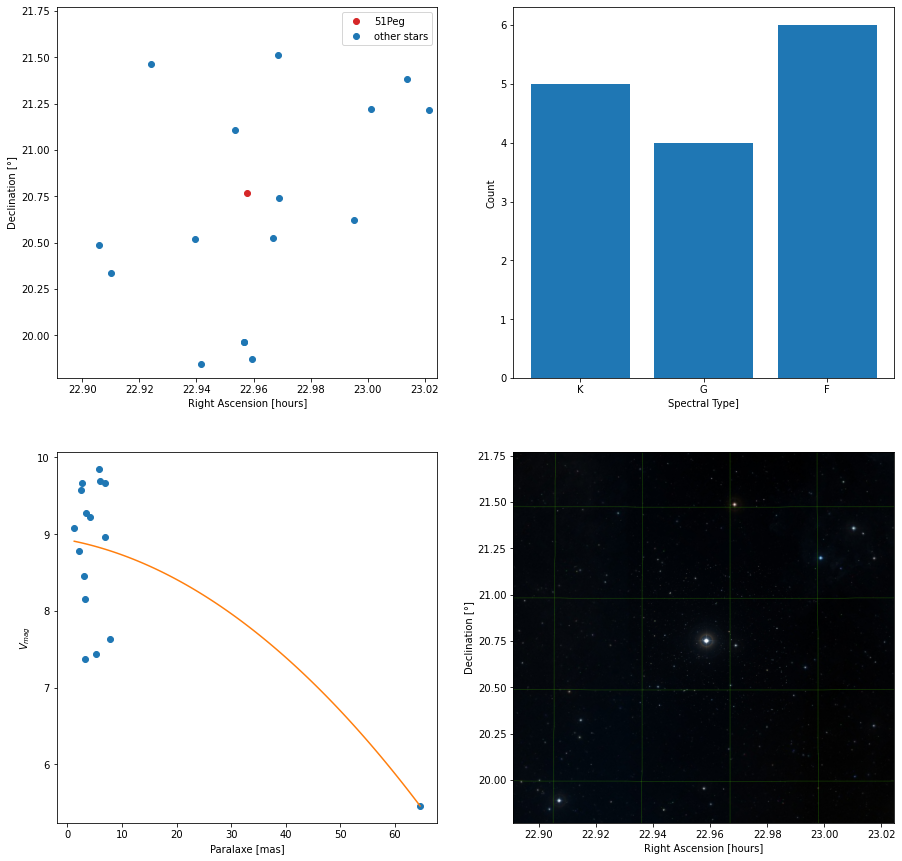

In [6]:
# defining figure
fig = mplt.figure(figsize=(15,15))

# TOP LEFT -----------------------------------------------------------------
ax_topLeft = fig.add_subplot(221)
for main_id,ra,dec in region_table[mask_mag]['MAIN_ID','RA','DEC']:
    if '51 Peg' in main_id:
        ra_51Peg = Angle(ra, unit=u.hourangle) /u.hourangle
        dec_51Peg = Angle(dec, unit=u.deg)/u.deg
        ax_topLeft.plot(ra_51Peg, dec_51Peg,'C3o',label='51Peg')
    else:
        ax_topLeft.plot(Angle(ra, unit=u.hourangle),Angle(dec, unit=u.deg),'C0o',label='other stars')

# remove duplicate labels in legend
handles, labels = ax_topLeft.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax_topLeft.legend(by_label.values(), by_label.keys())

# labels
ax_topLeft.set_xlabel('Right Ascension [hours]')
ax_topLeft.set_ylabel('Declination [°]')


# TOP RIGHT -----------------------------------------------------------------
ax_topRight = fig.add_subplot(222)
ax_topRight.bar(*zip(*sptypes_counts.items()))

# labels
ax_topRight.set_xlabel('Spectral Type]')
ax_topRight.set_ylabel('Count')

# BOTTOM LEFT -----------------------------------------------------------------
ax_bottomLeft = fig.add_subplot(223)
ax_bottomLeft.plot(region_table[mask_mag]['PLX_VALUE'],region_table[mask_mag]['FLUX_V'],'o')

ax_bottomLeft.plot(paralaxes_fine, poly2nd(paralaxes_fine),'-')

# labels
ax_bottomLeft.set_xlabel('Paralaxe [mas]')
ax_bottomLeft.set_ylabel('${V_{mag}}$')

# BOTTOM RIGHT -----------------------------------------------------------------
ax_bottomRight = fig.add_subplot(224, sharex = ax_topLeft, sharey = ax_topLeft)

ax_bottomRight.imshow(ax_bottomRight_data_fixed, cmap='gray', extent = [ra_51Peg - 1/15,ra_51Peg + 1/15,  dec_51Peg - 1,dec_51Peg + 1], aspect = 'auto', origin='lower')

# labels
ax_bottomRight.set_xlabel('Right Ascension [hours]')
ax_bottomRight.set_ylabel('Declination [°]')

mplt.show()

---
## Exercice #2 - Exoplanet numbers

Consider all exoplanets listed in the `exoplanet.eu` database. 

#### &rarr; Do a mass vs period scatter plot of the all exoplanets in the `exoplanet.eu` database.
#### Requirements:
- colors by detection method:
    - `Radial Velocities` - Blue
    - `Transits and Transit Timing Variations` - Red
    - All other methods - Green
- marker size proportional to their radii


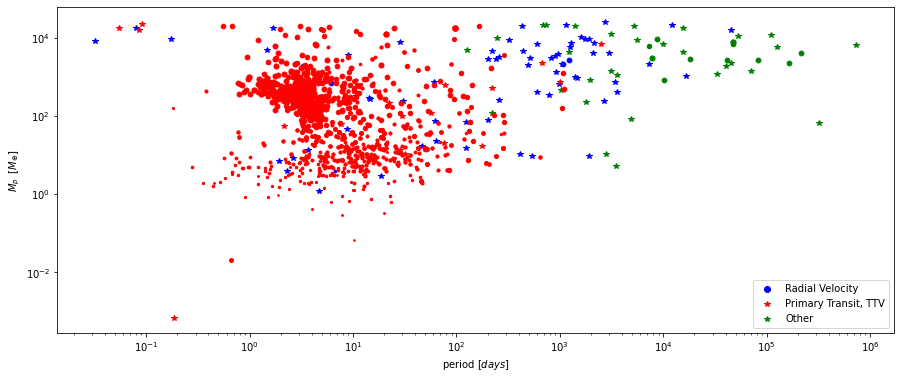

In [7]:
# Global values
FIGSIZE=(15,6)

# get data from exoplanet.eu using PyAstronomy
# Note: sorry for the confusion, astroquery does not allow to get the data from exoplanet.eu
db_exoplanetEU = ExoplanetEU2()

# print 'Available column names: '
# db_colnames = db_exoplanetEU.getColnames()
# for column in sorted(db_colnames):
#     print '   ', column

# extract data
# PyAstronomy comes as a Pandas Data Frame
panda_exoplanetEU = db_exoplanetEU.getAllDataPandas()


# make mass vs period/semi-major axis plot

fig_mass_period, ax_mass_period = mplt.subplots(1, figsize = FIGSIZE)

# defining methods labels and colors
methods = ['Microlensing',  'Pulsar', 'Other','Astrometry', 'Imaging','Radial Velocity','Primary Transit', 'TTV','Primary Transit, TTV']
colors = {'Astrometry':'green' , 'Primary Transit':"Red" , 'TTV':"Red" , 'Primary Transit, TTV':"Red", \
          'Microlensing': 'green', 'Radial Velocity': 'blue', 'Pulsar': 'green', 'Imaging':'green','Other':'green'}

# extracting data per method and target
for method in methods:
    planet_data = panda_exoplanetEU['detection_type'] == method

    periods = panda_exoplanetEU[planet_data]['orbital_period']
    masses = panda_exoplanetEU[planet_data]['mass'] * 319.
    radii = panda_exoplanetEU[planet_data]['radius']
    
    for period, mass, radius in zip(periods, masses, radii):
        if radius != radius:
            ax_mass_period.loglog(period,mass,'*', label = method, color = colors[method])
        else:
            ax_mass_period.loglog(period,mass,'o', label = method, color = colors[method], markersize = np.log(radius*100))


# make legend manually to avoid duplicates:
handles = [Line2D([0], [0], color='blue',  linestyle='', marker='o'),\
    Line2D([0], [0], color='red', linestyle='', marker='*'),\
        Line2D([0], [0], color='green', linewidth=3, linestyle='', marker='*')]
labels = ['Radial Velocity','Primary Transit, TTV', 'Other']

mplt.legend(handles,labels)

# labels
ax_mass_period.set_xlabel(r'period $[days]$')
ax_mass_period.set_ylabel(r'$M_{p}\;\;[M_{\oplus}]$')

# update font sizes all at once
params = {'legend.fontsize': 20,
              'axes.labelsize': 20,
              'axes.titlesize':'x-large',
              'xtick.labelsize':20,
              'ytick.labelsize':20}
    
mplt.rcParams.update(params)

mplt.show()


#### &rarr; Print on the console a table with selected exoplanet data.
#### Requirements:
- select only planets detected via the `radial velocity` method
- select the 20 most massive planets
- table should have 5 columns:
    - planet name
    - period
    - mass
    - host magnitude
    - planet orbital semi-amplitude
- table should have as headers the `exoplanet.eu` keywords for each column, as well as the units.
- table should be nicely formatted, with all column values right aligned, horizontal separators between the header and data, vertical separators between each column.

In [29]:
# imports
import numpy as np
from tabulate import tabulate

# select only planets detected via the radial velocity method
RV_planets = panda_exoplanetEU['detection_type'] == 'Radial Velocity'

# get headers list
# print(list(panda_exoplanetEU.columns))


# select the 20 most massive planets with the following columns
top_20_mass = panda_exoplanetEU.nlargest(20,'mass')[['name','orbital_period','mass', 'mag_v','k' ]]

# Running the Pandas Data Frame shows the data we want nicely printed
top_20_mass



,name,orbital_period,mass,mag_v,k
1073,HD 87883 b,2754.000000,81.90,7.57,NaN
4631,WD 1032+011 b,0.091559,70.00,NaN,48800.00
38,2MASS J0407+1546,NaN,67.00,NaN,NaN
27,2M1059-21 b,690.000000,66.95,NaN,NaN
981,HD 4747 b,12090.000000,66.60,7.15,755.30
4296,SDSS J080531+481233 B,740.430000,66.28,NaN,6400.00
746,HD 190228 b,1146.000000,65.70,7.30,NaN
4063,LHS 2397a B,5194.000000,64.00,19.57,NaN
4270,PZ Tel b,NaN,64.00,8.43,NaN
4689,gamma 1 Leo b,428.500000,63.88,2.01,NaN


In [30]:
# ... however not as asked in the exercice. To do so, we will use tabulate

table = tabulate(top_20_mass[['name','orbital_period','mass', 'mag_v','k' ]], headers='keys', tablefmt='psql', showindex=False, numalign="right", stralign="right")
print(table)

+-----------------------+------------------+--------+---------+---------+
|                  name |   orbital_period |   mass |   mag_v |       k |
|-----------------------+------------------+--------+---------+---------|
|            HD 87883 b |             2754 |   81.9 |    7.57 |     nan |
|         WD 1032+011 b |         0.091559 |     70 |     nan |   48800 |
|      2MASS J0407+1546 |              nan |     67 |     nan |     nan |
|           2M1059-21 b |              690 |  66.95 |     nan |     nan |
|             HD 4747 b |            12090 |   66.6 |    7.15 |   755.3 |
| SDSS J080531+481233 B |           740.43 |  66.28 |     nan |    6400 |
|           HD 190228 b |             1146 |   65.7 |     7.3 |     nan |
|           LHS 2397a B |             5194 |     64 |   19.57 |     nan |
|              PZ Tel b |              nan |     64 |    8.43 |     nan |
|         gamma 1 Leo b |            428.5 |  63.88 |    2.01 |     nan |
|            CoRoT-15 b |          3.0

--- 


<img align="left" width="500" src="./know_more_banner.png">  <br />  <br />  

email us at <Jorge.Martins@astro.up.pt> or <Andre.Silva@astro.up.pt>